In [ ]:
import pandas
import konlpy
import gensim

print(pandas.__version__)
print(konlpy.__version__)
print(gensim.__version__)

C:\Anaconda3\lib\site-packages\paramiko\pkey.py:82: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "cipher": algorithms.TripleDES,
C:\Anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.Blowfish and will be removed from this module in 45.0.0.
  "class": algorithms.Blowfish,
C:\Anaconda3\lib\site-packages\paramiko\transport.py:243: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "class": algorithms.TripleDES,


2.2.3
0.6.0
4.3.3


In [ ]:
train_data_path = "C:/Users/양자/Desktop/Hun_Works/AIFFEL_quest_rs/Exploration/ex05/ratings_train.txt"
test_data_path = "C:/Users/양자/Desktop/Hun_Works/AIFFEL_quest_rs/Exploration/ex05/ratings_test.txt"
train_data = open(train_data_path, 'r', encoding = 'utf-8')
test_data = open(test_data_path, 'r', encoding = 'utf-8')

train_data_list = train_data.readlines()
test_data_list = test_data.readlines()

In [ ]:
train_data_list[0:10]

['id\tdocument\tlabel\n',
 '9976970\t아 더빙.. 진짜 짜증나네요 목소리\t0\n',
 '3819312\t흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나\t1\n',
 '10265843\t너무재밓었다그래서보는것을추천한다\t0\n',
 '9045019\t교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정\t0\n',
 '6483659\t사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다\t1\n',
 '5403919\t막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.\t0\n',
 '7797314\t원작의 긴장감을 제대로 살려내지못했다.\t0\n',
 '9443947\t별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지..정말 발로해도 그것보단 낫겟다 납치.감금만반복반복..이드라마는 가족도없다 연기못하는사람만모엿네\t0\n',
 '7156791\t액션이 없는데도 재미 있는 몇안되는 영화\t1\n']

In [ ]:
# 라벨이랑 텍스트랑 나누기
def parse_data(data_lines):
    parsed_data = []
    for line in data_lines[1:]:
        parts = line.strip().split("\t")
        if len(parts) < 3:
            continue  # 데이터 형식에 문제가 있는 경우 건너뜁니다.
        # parts[0]: id, parts[1]: document, parts[2]: label
        document = parts[1]
        try:
            label = int(parts[2])
        except ValueError:
            continue  # label 변환에 실패하면 해당 줄 건너뛰기
        parsed_data.append((document, label))
    return parsed_data

parsed_train_data = parse_data(train_data_list)
parsed_test_data = parse_data(test_data_list)

In [ ]:
print(parsed_train_data[:3])

[('아 더빙.. 진짜 짜증나네요 목소리', 0), ('흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나', 1), ('너무재밓었다그래서보는것을추천한다', 0)]


In [ ]:
#불용어 제거
from konlpy.tag import Okt
okt = Okt()
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

def remove_stopwords(sentence):
    tokens = okt.morphs(sentence)  # 형태소 분석
    return " ".join([word for word in tokens if word not in stopwords])  # 불용어 제거 후 다시 문자열로 변환

# 문서와 라벨 분리
train_texts = [doc for doc, label in parsed_train_data]
train_labels = [label for doc, label in parsed_train_data]
test_texts  = [doc for doc, label in parsed_test_data]
test_labels  = [label for doc, label in parsed_test_data]

# 불용어 제거 (문서 전처리)
cleaned_train_texts = [remove_stopwords(text) for text in train_texts]
cleaned_test_texts  = [remove_stopwords(text) for text in test_texts]

padded_test shape: (50000, 96)
len(y_test): 30000
y_pred shape: (50000, 1)


In [ ]:
print(cleaned_train_texts[:3])
print(cleaned_test_texts[:3])

['아 더빙 .. 진짜 짜증나네요 목소리', '흠 ... 포스터 보고 초딩 영화 줄 .... 오버 연기 조차 가볍지 않구나', '너 무재 밓었 다그 래서 보는것을 추천 다']
['굳 ㅋ', 'GDNTOPCLASSINTHECLUB', '뭐 야 평점 .... 나쁘진 않지만 10 점 짜 리 더 더욱 아니잖아']


In [ ]:
from sklearn.model_selection import train_test_split

X_train_texts, X_val_texts, y_train, y_val = train_test_split(cleaned_train_texts,
                                                              train_labels,
                                                              test_size=0.2,
                                                              random_state=42)

In [ ]:
# 단어 빈도 세는 함수 -> 상위1만개 짜를거
def build_counter(sentences):
    counter = collections.Counter()
    for sentence in sentences:
        tokens = okt.morphs(sentence)
        counter.update(tokens)
    return counter

In [ ]:
counter = build_counter(X_train_texts)

In [ ]:
# 특수 4개를 시작할 때 넣고, 이후부터 상위 1만개로 컷
def build_word_to_index(counter, top_n=10000, special_tokens=["<PAD>", "<UNK>", "<BOS>", "<EOS>"]):
    word_to_index = {token: idx for idx, token in enumerate(special_tokens)}
    index = len(special_tokens)
    most_common = counter.most_common(top_n)
    for word, _ in most_common:
        if word not in word_to_index:
            word_to_index[word] = index
            index += 1
    return word_to_index

In [ ]:
word_to_index = build_word_to_index(counter, top_n=10000)
index_to_word = {index: word for word, index in word_to_index.items()}

In [ ]:
def get_encoded_sentence(sentence, word_to_index):
    # <BOS> 시작
    return [word_to_index['<BOS>']] + [
        word_to_index[word] if word in word_to_index else word_to_index['<UNK>']
        for word in sentence.split()
    ]

def get_encoded_sentences(sentences, word_to_index):
    return [get_encoded_sentence(sentence, word_to_index) for sentence in sentences]

def get_decoded_sentence(encoded_sentence, index_to_word):
    # <BOS> 토큰은 제외 디코딩
    return ' '.join(
        index_to_word[index] if index in index_to_word else '<UNK>'
        for index in encoded_sentence[1:]
    )

def get_decoded_sentences(encoded_sentences, index_to_word):
    return [get_decoded_sentence(encoded_sentence, index_to_word) for encoded_sentence in encoded_sentences]

In [ ]:
#테스트 동작 확인ㅌ
test_sentence = '안녕 야말'
test_sentences = [test_sentence, "사랑 싫어"]

encoded_list = get_encoded_sentences(test_sentences, word_to_index)

decoded_list = get_decoded_sentences(encoded_list, index_to_word)

print(encoded_list)
print(decoded_list)

[[2, 5959, 1], [2, 74, 3435]]
['안녕 <UNK>', '사랑 싫어']


In [ ]:
# 학습, 검증, 테스트 인코딩
encoded_train = get_encoded_sentences(X_train_texts, word_to_index)
encoded_val   = get_encoded_sentences(X_val_texts, word_to_index)
encoded_test  = get_encoded_sentences(cleaned_test_texts, word_to_index)

#최대 길이를 기준패딩
max_length = max(len(seq) for seq in encoded_train)
padded_train = pad_sequences(encoded_train, maxlen=max_length, padding='post')
padded_val   = pad_sequences(encoded_val, maxlen=max_length, padding='post')
padded_test  = pad_sequences(encoded_test, maxlen=max_length, padding='post', truncating='post')


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [ ]:
# 학습 결과 시각화
def plot_history(history):
    plt.figure(figsize=(12, 5))

    # 손실 시각화
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss Curve')
    plt.legend()

    # 정확도 시각화
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Acc')
    plt.plot(history.history['val_accuracy'], label='Val Acc')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy Curve')
    plt.legend()

    plt.show()

In [ ]:
model = keras.Sequential([
    layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,), name="embedding"),
    layers.LSTM(256),
    layers.Dense(128, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])
model.summary()

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss',
                                         patience=3),
            keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5',
                                            monitor="val_loss",
                                            save_best_only=True)]

history = model.fit(padded_train, np.array(y_train), epochs=20, callbacks = callbacks, validation_data=(padded_val, np.array(y_val)))

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, None, 128)         1280512   
                                                                 
 lstm_9 (LSTM)               (None, 256)               394240    
                                                                 
 dense_27 (Dense)            (None, 128)               32896     
                                                                 
 dense_28 (Dense)            (None, 32)                4128      
                                                                 
 dense_29 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1,711,809
Trainable params: 1,711,809
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
3750/3750 [======================

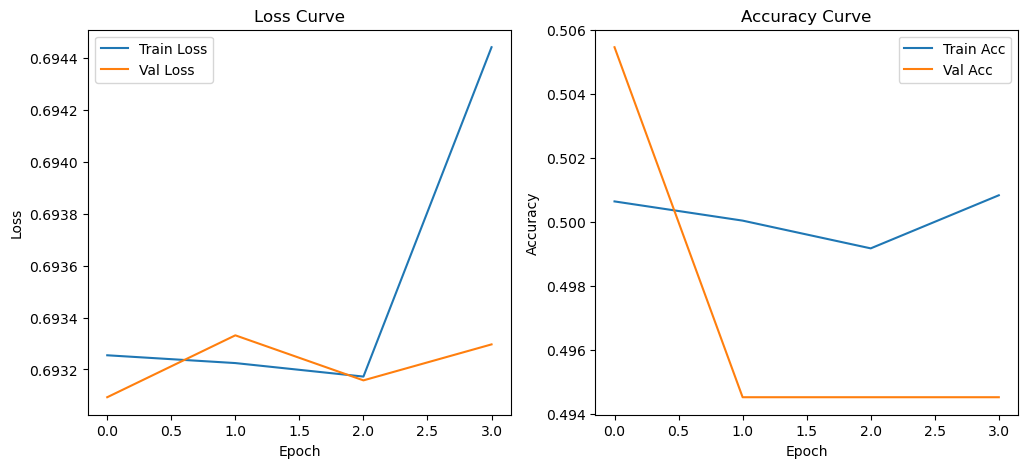

In [ ]:
plot_history(history)

In [ ]:
y_test = test_labels

1563/1563 [==============================] - 10s 6ms/step


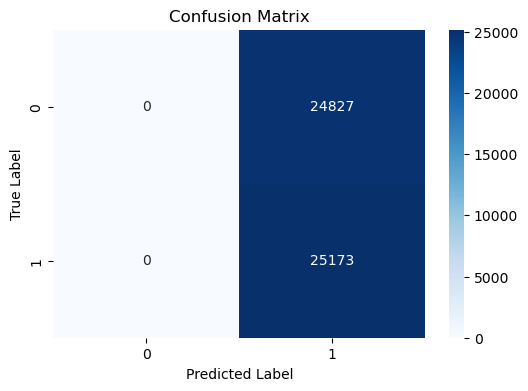

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     24827
           1       0.50      1.00      0.67     25173

    accuracy                           0.50     50000
   macro avg       0.25      0.50      0.33     50000
weighted avg       0.25      0.50      0.34     50000



C:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
pred_probs = model.predict(padded_test)
y_pred = (pred_probs > 0.5).astype(int).reshape(-1)

# cm 구하기
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

print(classification_report(y_test, y_pred))

In [ ]:
from tensorflow.keras import regularizers

model_conv = keras.Sequential([
    layers.Embedding(vocab_size, word_vector_dim, input_length=max_length, name="embedding_1dconv"),
    layers.Conv1D(filters=16, kernel_size=5, activation='relu',
                  kernel_regularizer=regularizers.l2(0.001)),
    layers.GlobalMaxPooling1D(),
    layers.Dropout(0.5),
    layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])
model_conv.summary()

model_conv.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])


callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss',
                                         patience=3),
            keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5',
                                            monitor="val_loss",
                                            save_best_only=True)]

history_conv = model_conv.fit(padded_train, np.array(y_train),
                              epochs=10,
                              callbacks=callbacks,
                              validation_data=(padded_val, np.array(y_val)))

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1dconv (Embedding  (None, 96, 128)          1280512   
 )                                                               
                                                                 
 conv1d_15 (Conv1D)          (None, 92, 16)            10256     
                                                                 
 global_max_pooling1d_19 (Gl  (None, 16)               0         
 obalMaxPooling1D)                                               
                                                                 
 dropout_20 (Dropout)        (None, 16)                0         
                                                                 
 dense_70 (Dense)            (None, 32)                544       
                                                                 
 dropout_21 (Dropout)        (None, 32)              

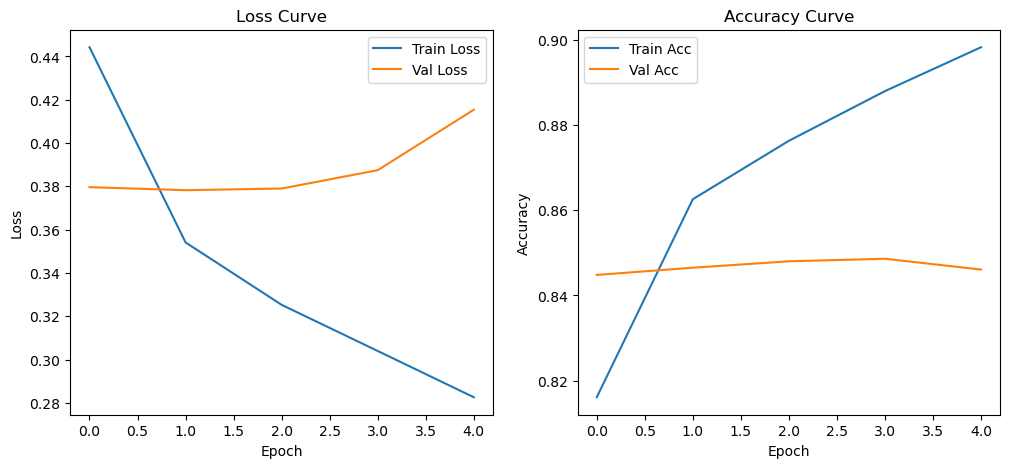

In [ ]:
plot_history(history_conv)

1563/1563 [==============================] - 10s 6ms/step


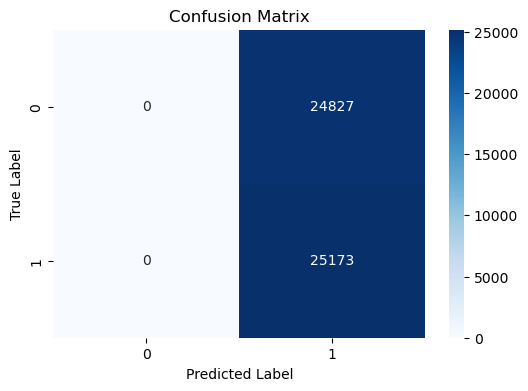

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     24827
           1       0.50      1.00      0.67     25173

    accuracy                           0.50     50000
   macro avg       0.25      0.50      0.33     50000
weighted avg       0.25      0.50      0.34     50000



C:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
pred_probs = model_conv.predict(padded_test)
y_pred = (pred_probs > 0.5).astype(int).reshape(-1)

# cm 구하기
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

print(classification_report(y_test, y_pred))

In [ ]:
model_bi_lstm = keras.Sequential([
    layers.Embedding(vocab_size, word_vector_dim, input_length=max_length, name="embedding_bi_lstm"),
    layers.Bidirectional(layers.LSTM(128)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

callbacks = keras.callbacks.EarlyStopping(monitor='val_loss',
                                         patience=3)

model_bi_lstm.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy'])
model_bi_lstm.summary()

model_bi_lstm.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss',
                                         patience=3),
            keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5',
                                            monitor="val_loss",
                                            save_best_only=True)]

history_bi_lstm = model_bi_lstm.fit(padded_train, np.array(y_train),
                              epochs=10,
                              callbacks=callbacks,
                              validation_data=(padded_val, np.array(y_val)))

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_13 (Embedding)    (None, 96, 128)           1280512   
                                                                 
 bidirectional (Bidirectiona  (None, 256)              263168    
 l)                                                              
                                                                 
 dense_32 (Dense)            (None, 64)                16448     
                                                                 
 dense_33 (Dense)            (None, 1)                 65        
                                                                 
Total params: 1,560,193
Trainable params: 1,560,193
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
3750/3750 [==============================] - 106s 28ms/step - loss: 0.3766 - accuracy: 0.8275 - va

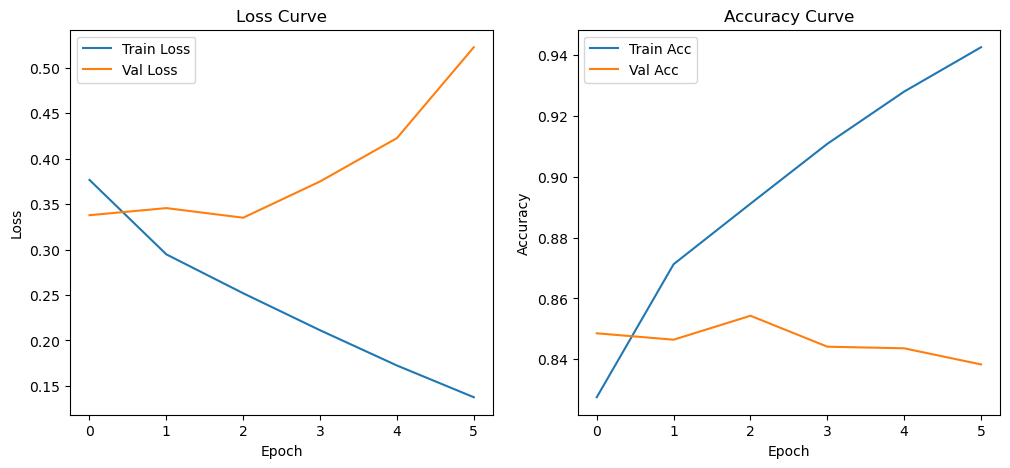

In [ ]:
plot_history(history_bi_lstm)

1563/1563 [==============================] - 15s 9ms/step


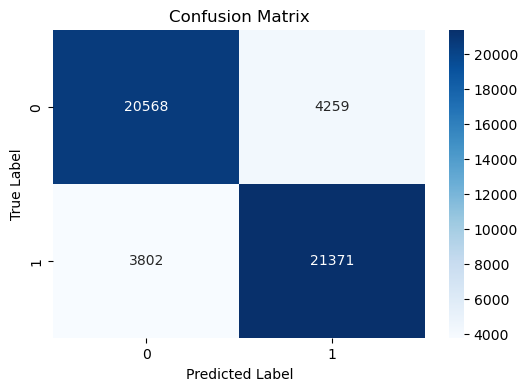

              precision    recall  f1-score   support

           0       0.84      0.83      0.84     24827
           1       0.83      0.85      0.84     25173

    accuracy                           0.84     50000
   macro avg       0.84      0.84      0.84     50000
weighted avg       0.84      0.84      0.84     50000



In [ ]:
pred_probs = model_bi_lstm.predict(padded_test)
y_pred = (pred_probs > 0.5).astype(int).reshape(-1)

# cm 구하기
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

print(classification_report(y_test, y_pred))

In [ ]:
import os
from gensim.models import Word2Vec
from gensim.models.keyedvectors import Word2VecKeyedVectors

word2vec_file_path = os.path.abspath("C:/temp files/word2vec_ko.model")

word_vectors = Word2VecKeyedVectors.load(word2vec_file_path)


In [ ]:
embedding_dim = 100  # Word2Vec 모델의 임베딩 차원
vocab_size = len(word_to_index)  # 예를 들어, 상위 10,000 단어 + 4 특수 토큰 등

embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in word_to_index.items():
    if word in word_vectors.wv:
        embedding_matrix[i] = word_vectors.wv[word]
    else:
        embedding_matrix[i] = np.random.normal(scale=0.6, size=(embedding_dim,))



In [ ]:
embedding_layer = layers.Embedding(input_dim=vocab_size,
                                   output_dim=embedding_dim,
                                   weights=[embedding_matrix],
                                   input_length=max_length,
                                   trainable=False,
                                   name="embedding_layer")

In [ ]:
from tensorflow.keras import regularizers

model_conv = keras.Sequential([
    embedding_layer,
    layers.Conv1D(filters=16, kernel_size=5, activation='relu',
                  padding='same',
                  kernel_regularizer=regularizers.l2(0.0005)),
    layers.GlobalMaxPooling1D(),
    layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.0005)),
    layers.Dense(1, activation='sigmoid')
])
model_conv.summary()

model_conv.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])


callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss',
                                         patience=3),
            keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5',
                                            monitor="val_loss",
                                            save_best_only=True)]

history_conv = model_conv.fit(padded_train, np.array(y_train),
                              epochs=10,
                              callbacks=callbacks,
                              validation_data=(padded_val, np.array(y_val)))

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_layer (Embedding)  (None, 96, 100)          1000400   
                                                                 
 conv1d_12 (Conv1D)          (None, 96, 16)            8016      
                                                                 
 global_max_pooling1d_16 (Gl  (None, 16)               0         
 obalMaxPooling1D)                                               
                                                                 
 dense_64 (Dense)            (None, 16)                272       
                                                                 
 dense_65 (Dense)            (None, 1)                 17        
                                                                 
Total params: 1,008,705
Trainable params: 8,305
Non-trainable params: 1,000,400
_______________________________________

KeyboardInterrupt: 

In [ ]:
plot_history(history_conv)
pred_probs = model_conv.predict(padded_test)
y_pred = (pred_probs > 0.5).astype(int).reshape(-1)

# cm 구하기
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

print(classification_report(y_test, y_pred))

    오늘의 회고:
    0. 오후 5시 19분이 되어서야 예시답안이 있음을 깨달았다 . . .
    1. 너무 시간이 없었음
    2. 하이퍼파라미터랑 모델 튜닝을 계속 시도했는데 어떻게 이럴 수 있나 싶을정도로 85퍼가 안나옴
        1D conv 레이어가 그나마 84퍼가 뜨는데, word2vec 쓰니까 오히려 효율이 떨어짐. 내 모델엔 안맞나...
    3. lstm을 쓸 때, confusion matrix를 보면 알겠지만 분류를 수행한 것이 아니라 일자로 찍는 기능을 수행해버렸는데 어찌 이런 일이... bidirectional lstm은 성공적이었는데 왜인지 모르겠음
    4. 아니 지금보니까 conv 1d 모델 그림 플롯을 잘못했는데... 코드는 수정했지만 그림은 도저히 안되겠다 시간상
    5. 무조건 오늘 끝나고 더 시도한다